# Advanced Data Analysis 
- Managing large sets of data
- Merging multiple datasets with multi-indexing 
- Panel regression


### Double indexing panel data 
- data is often identified by mutiple indeces


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# index_col = [0,2] will select  countrycode as the primary index and year as
# the secondary index
data = pd.read_excel("mpd2018.xlsx", sheet_name="Full data", index_col=[0, 2])

In [2]:
data  #prints dataframe

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

In [3]:
data.index  #displays list of tuples including ISO Code and year

MultiIndex([('AFG', 1820),
            ('AFG', 1870),
            ('AFG', 1913),
            ('AFG', 1950),
            ('AFG', 1951),
            ('AFG', 1952),
            ('AFG', 1953),
            ('AFG', 1954),
            ('AFG', 1955),
            ('AFG', 1956),
            ...
            ('ZWE', 2007),
            ('ZWE', 2008),
            ('ZWE', 2009),
            ('ZWE', 2010),
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016)],
           names=['countrycode', 'year'], length=19873)

In [4]:
years = list(set(data.index.get_level_values('year')))
years

[1,
 730,
 1000,
 1150,
 1280,
 1281,
 1282,
 1283,
 1284,
 1285,
 1286,
 1287,
 1288,
 1289,
 1290,
 1291,
 1292,
 1293,
 1294,
 1295,
 1296,
 1297,
 1298,
 1299,
 1300,
 1301,
 1302,
 1303,
 1304,
 1305,
 1306,
 1307,
 1308,
 1309,
 1310,
 1311,
 1312,
 1313,
 1314,
 1315,
 1316,
 1317,
 1318,
 1319,
 1320,
 1321,
 1322,
 1323,
 1324,
 1325,
 1326,
 1327,
 1328,
 1329,
 1330,
 1331,
 1332,
 1333,
 1334,
 1335,
 1336,
 1337,
 1338,
 1339,
 1340,
 1341,
 1342,
 1343,
 1344,
 1345,
 1346,
 1347,
 1348,
 1349,
 1350,
 1351,
 1352,
 1353,
 1354,
 1355,
 1356,
 1357,
 1358,
 1359,
 1360,
 1361,
 1362,
 1363,
 1364,
 1365,
 1366,
 1367,
 1368,
 1369,
 1370,
 1371,
 1372,
 1373,
 1374,
 1375,
 1376,
 1377,
 1378,
 1379,
 1380,
 1381,
 1382,
 1383,
 1384,
 1385,
 1386,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1393,
 1394,
 1395,
 1396,
 1397,
 1398,
 1399,
 1400,
 1401,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1409,
 1410,
 1411,
 1412,
 1413,
 1414,
 1415,
 1416,
 1417,
 1418,
 14

In [5]:
countries = list(data.groupby("countrycode").mean().index)
countries

['AFG',
 'AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRB',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CSK',
 'CUB',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FRA',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GTM',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDA',
 'MDG',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'NAM',
 'NER',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'POL',
 'PRI',
 'PRK',


### Plotting multi-index data
- plot data by country to start

In [6]:
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("USA", "GBR", "ESP", "MEX")]
linestyles = ["-", ":", "--", "-."]

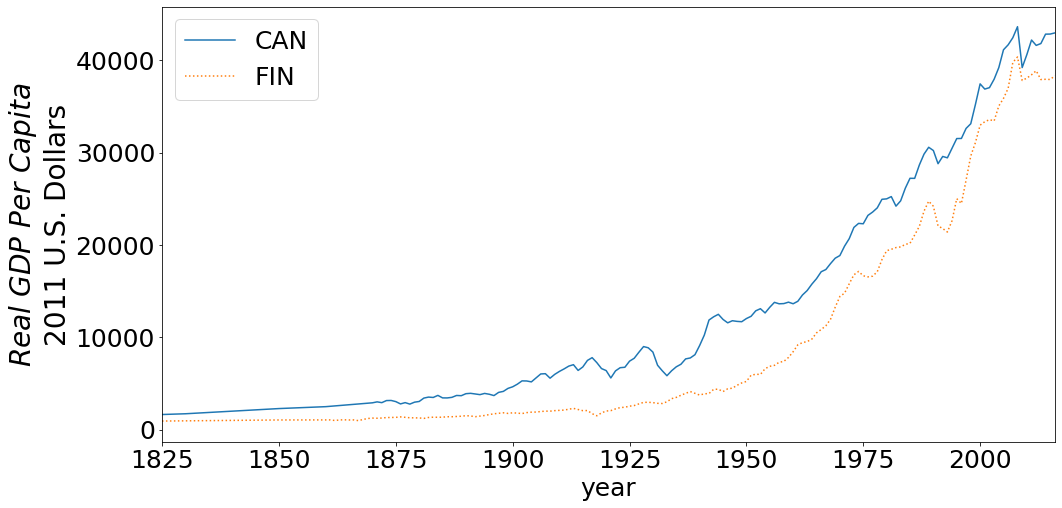

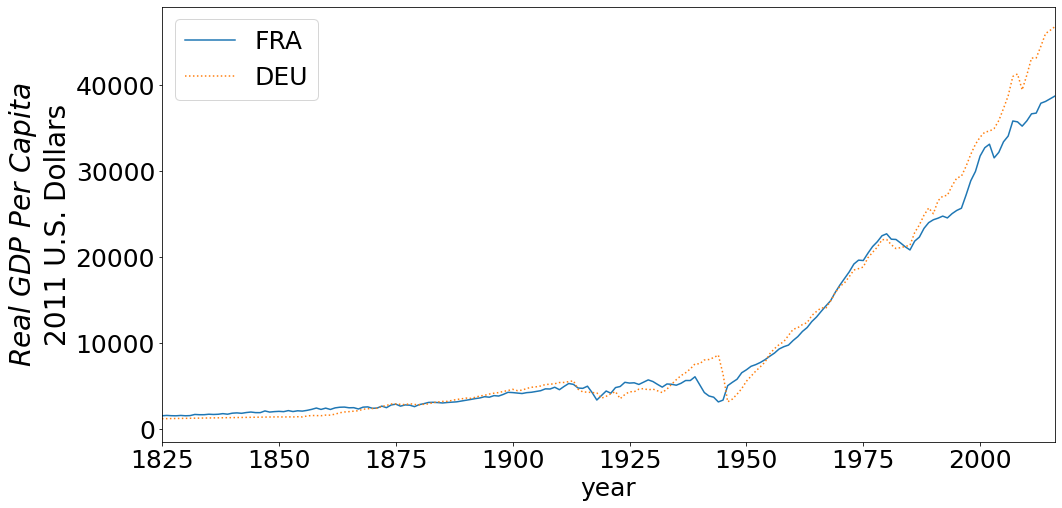

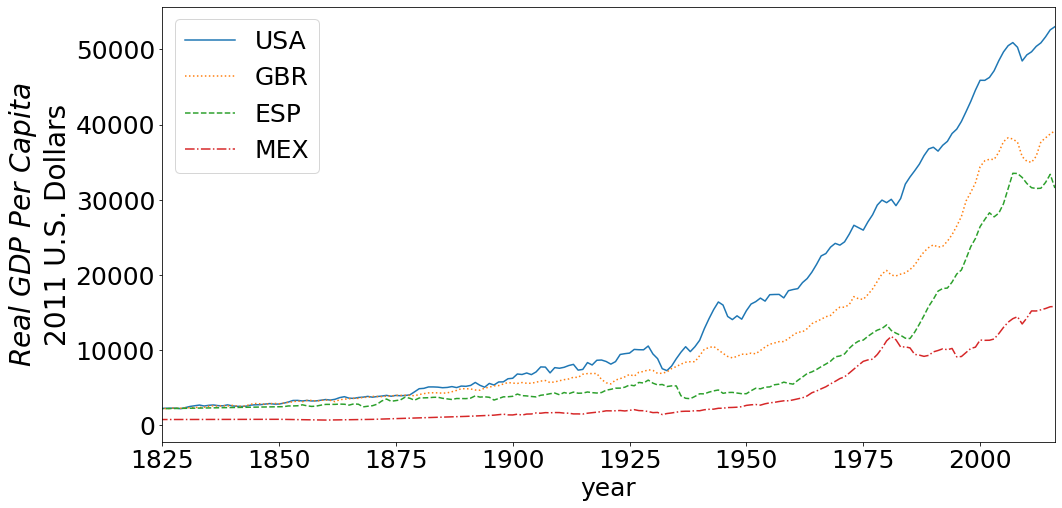

In [7]:
plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})
plt.rcParams.update({"font.size": 25})
for pair in pairs:
    fig, ax = plt.subplots(figsize=(16, 8))
    for i in range(len(pair)):
        country = pair[i]
        linestyle = linestyles[i]
        data.loc[country, :]["cgdppc"].dropna().plot.line(ax=ax,
                                                          label=country,
                                                          linestyle=linestyle)
    plt.xlim([1825, max(years)])
    plt.ylabel("$Real$ $GDP$ $Per$ $Capita$\n2011 U.S. Dollars", fontsize=28)
    plt.legend()
    plt.show()
    plt.close()
    

## Merging multiple datasets and creating common index 

In [8]:
import pandas as pd

fraser_data = pd.read_csv("cleanedEconFreedomData (1).csv",  # dropna twice to clean rows and columns
                            index_col=[0, 1],
                            parse_dates=False).dropna(axis=0, thresh=1).dropna(
                                axis=1, thresh=1)

maddison_data = data

In [9]:
fraser_data["RGDP Per Capita"] = maddison_data["rgdpnapc"]
fraser_data

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP Per Capita  
ISO_Code Year                   
ALB      2017              NaN  
         2016          10342.0  
         2015          10032.0  
         2014           9808.0  
         2013           9660.0  
...                        ...  
ZWE      2000           2249.0  
         1995           2156.0  
         1990           2232.0  
         1985           2198.0  
         1980           2133.0  

[3030 rows x 7 columns]

In [10]:
fraser_data.to_csv("fraserDataWithRGDPPC.csv")

## Creating indicator variables
- Countries residing in North America would be indicated with a 1 (i.e., True), and those outside of North America would receive a zero.

In [12]:
def create_indicator_variables(data, indicator_name, index_name,
                               target_index_list):
    data[indicator_name] = 0
    data.loc[target_index_list, [indicator_name]] = int(1)


data = fraser_data

index_name = data.index.names[0]
indicator_name = "North America"

countries_in_north_america = [
    "BHS", "BLZ", "CAN", "CRI", "DOM", "SLV", "GTM", "HTI", "HND",
    "JAM", "MEX", "NIC", "PAN", "TTO", "USA"
]
create_indicator_variables(data=data,
                           indicator_name=indicator_name,
                           index_name=index_name,
                           target_index_list=countries_in_north_america)

In [13]:
data.loc[countries_in_north_america, "North America"]

ISO_Code  Year
BHS       2017    1
          2016    1
          2015    1
          2014    1
          2013    1
                 ..
USA       1990    1
          1985    1
          1980    1
          1975    1
          1970    1
Name: North America, Length: 322, dtype: int64

## Creating quintiles(or any percentage subdivision)


Text(0.5, 1.0, '2000')

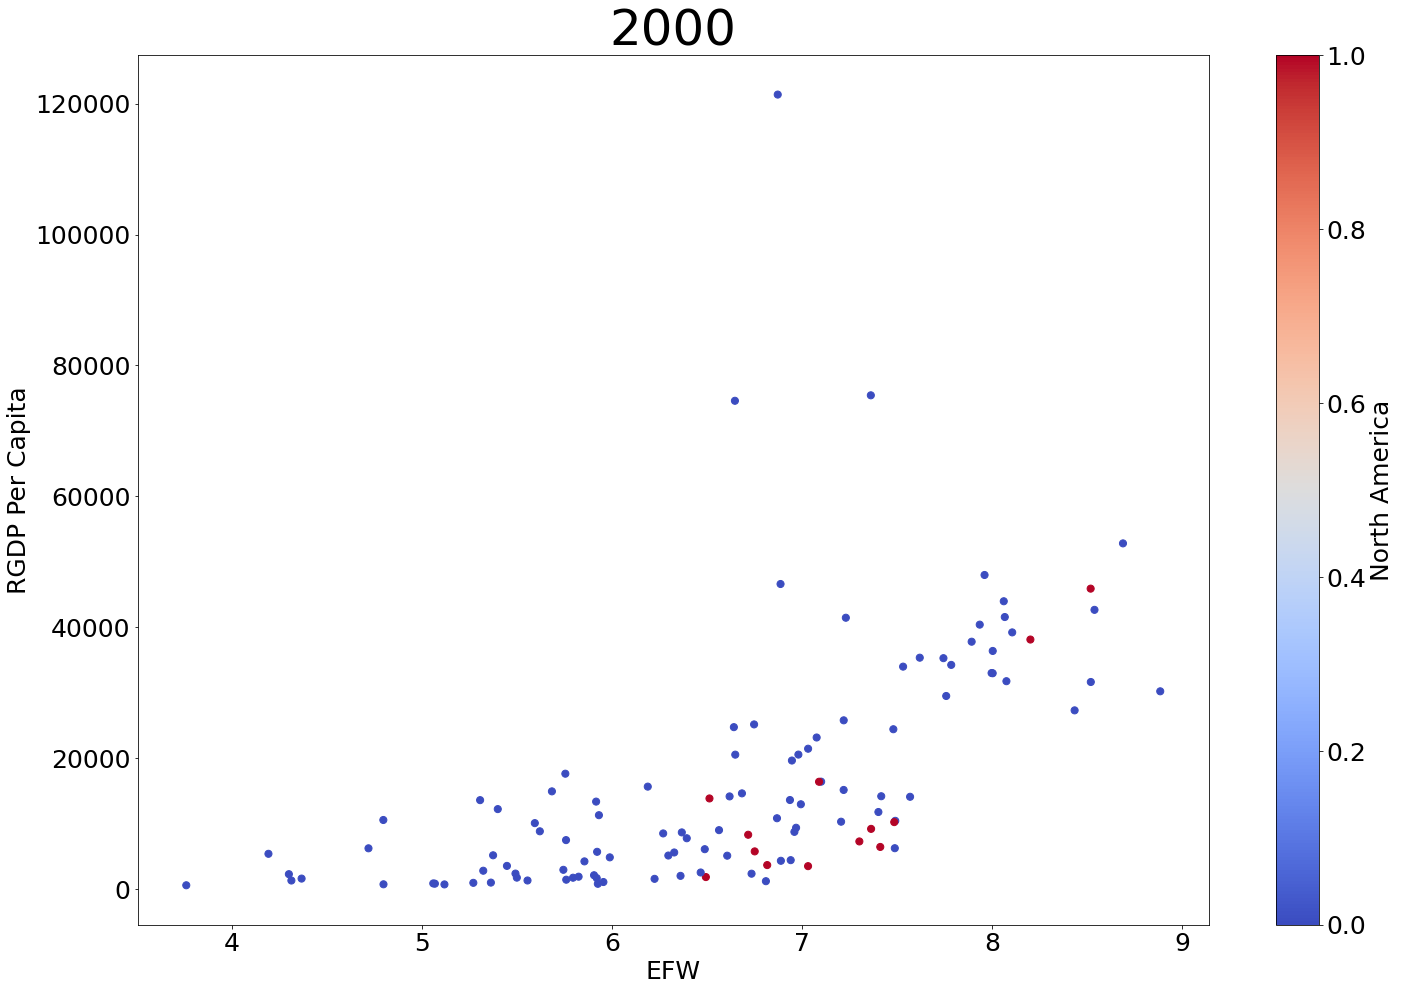

In [14]:
from matplotlib import cm
import datetime

year = 2000

plot_data = data[data.index.get_level_values("Year") == 2000]

norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

fig, ax = plt.subplots(figsize=(24, 16))
plot_data.plot.scatter(x="EFW",
                       y="RGDP Per Capita",
                       c="North America",
                       cmap="coolwarm",
                       ax=ax,
                       s=50)
ax.set_title(str(year), fontsize=50)

[0.  0.2 0.4 0.6 0.8 1. ]


<ipython-input-16-0b5121bf11b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


Text(0.5, 1.0, '2000')

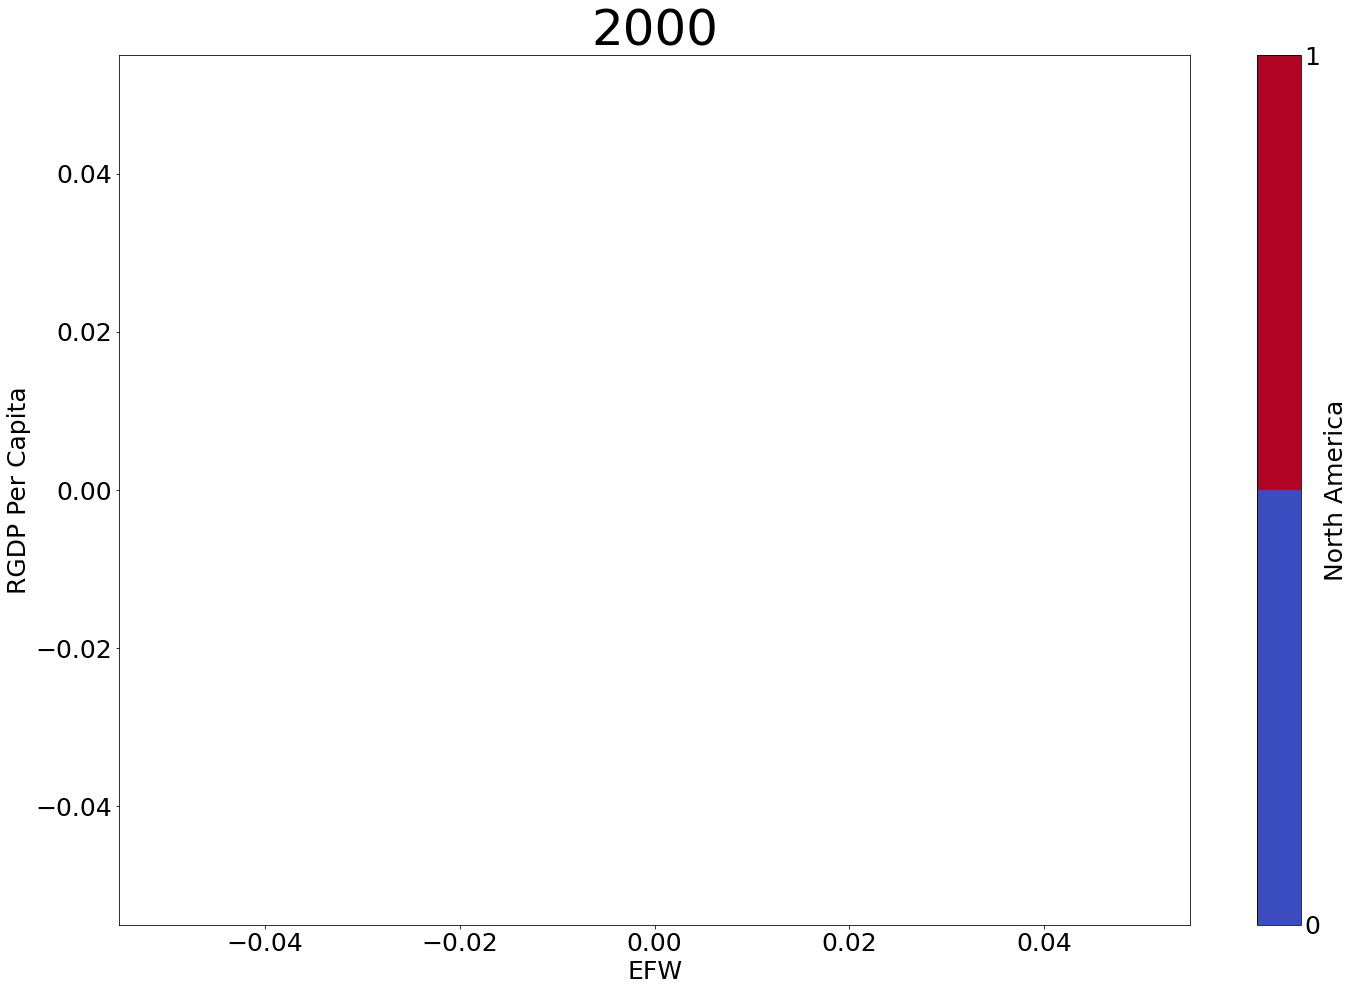

In [16]:
import datetime
from matplotlib import cm

year = 2000
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita", 
                       c = "North America",
                      cmap = cmap, ax = ax, norm = norm, s = 50)

# to remove numbers between 0 and 1, access the color axis through plt.gcf()
f = plt.gcf()
cax  = f.get_axes()[1]
# access colorbar values
vals = cax.get_yticks()
print(vals)
# only include 0 or 1
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
# remove tick lines from color axis
cax.tick_params(length = 0)

ax.set_title(str(year), fontsize = 50)

In [71]:
#quantile.py  
import pandas as pd  
import numpy as np  

# choose numbers of divisions  
n = 8
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
#create column identifying n-tile rank  
quantile_var = "RGDP Per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

# Creating quantiles of our data: 
we can find the points for each variable at which the ith Ntile occurs 

In [72]:

#quantile.py  
import pandas as pd  
import numpy as np  
  
def create_quantile(n, data, year, quantile_var, quantile_name):  
    # index that indentifies countries for a given year  
    year_index = data.index.get_level_values("Year") == year  
    quantile_values_dict = {i:data[year_index][quantile_var]\
                            .quantile(i/n) for i in range(1, n + 1)}  
    # cycle through each country for a given year  
    for index in data[year_index].index:  
        # identtify value of the variable of interest  
        val = data.loc[index][quantile_var]  
        # compare that value to the values that divide each quantile  
        for i in range(1, n + 1):  
            # if the value is less than the highest in the quantile identified,  
            # save quantile as i  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)  
                break  
            else:  
                 continue  


years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

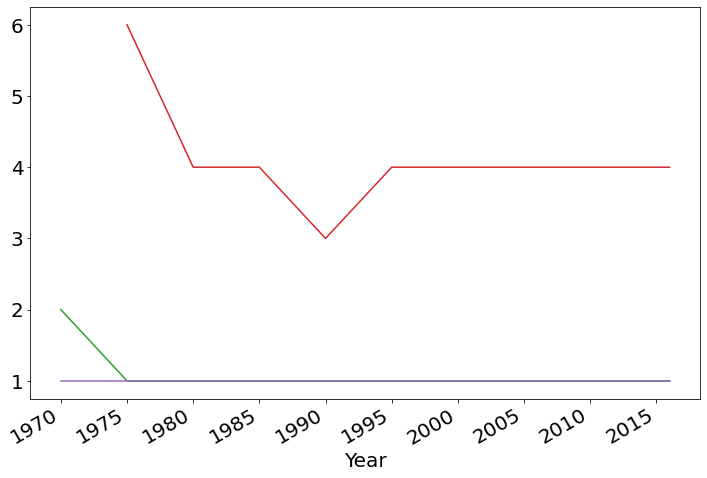

In [73]:
countries = ["BHS", "BLZ", "CAN", "MEX", "USA"]
fig, ax = plt.subplots(figsize = (12, 8))
for country in countries: 
    data.loc[country, (f"RGDP Per Capita {n}-tile")].plot.line(ax = ax, label = country)
    
    


C:\Users\jzach\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scatter = ax.scatter(


Text(0.5, 1.0, 'Year: 2016')

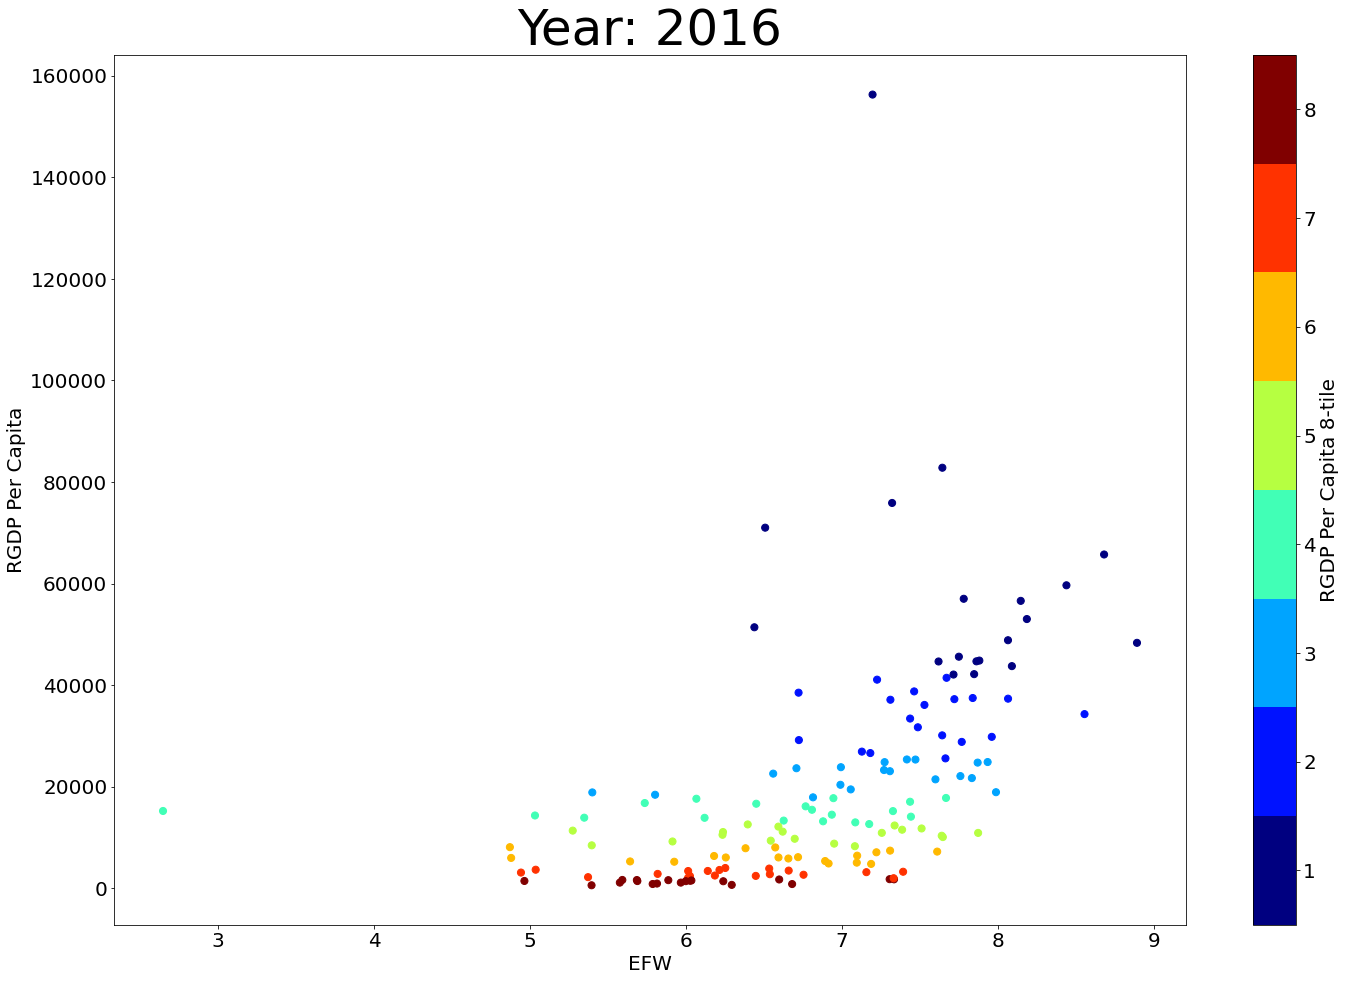

In [75]:
year = 2016
plt.rcParams.update({"font.size":20})
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))

norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = cmap, norm = norm,  ax = ax, s = 50,
                      legend = False, vmin = 0.5, vmax = n+.5)
ax.set_title("Year: " + str(year), fontsize = 50)

# OLS Indicator Variables 


In [82]:
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")["RGDP Per Capita"].shift(-1)
data.loc["USA"].index["2001"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices